<a href="https://colab.research.google.com/github/tonyyoung3/ibm_ML_practice/blob/master/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as solver
from functools import reduce


In [ ]:
df = pd.read_csv('efficient_frontier.csv',index_col=0,parse_dates=True)
total_stock = len(df.columns)
returns = df.pct_change()
returns = returns[1:]
#returns.head()

,2317,2542,2881,2324,2535,5880,1101,2330,2301,4938
2019-01-03,-0.017118,NaN,-0.006508,-0.002865,-0.005115,NaN,-0.009859,-0.018223,NaN,-0.011952
2019-01-04,-0.018868,NaN,-0.010917,-0.017241,-0.007712,-0.002825,NaN,-0.034803,-0.020482,-0.022177
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.010101,-0.009868,-0.005441,-0.005731,NaN,NaN,-0.012500,-0.009390,NaN,-0.022680
2019-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-25,NaN,NaN,-0.001075,NaN,NaN,NaN,-0.001159,NaN,NaN,NaN
2019-12-26,-0.002198,NaN,NaN,NaN,-0.002375,NaN,-0.001160,NaN,NaN,-0.001443
2019-12-27,NaN,NaN,NaN,NaN,NaN,-0.002387,NaN,NaN,NaN,NaN
2019-12-30,-0.006557,NaN,-0.001070,-0.002632,-0.002370,-0.004785,NaN,-0.010355,-0.001001,-0.008646


In [ ]:
covariance_matrix = returns.cov() * 252
stocks_expected_return = returns.mean() * 252
stocks_weights = np.array([.1, .1, .1, .1,.1,.1,.1,.1,.1,.1])
portfolio_return = sum(stocks_weights * stocks_expected_return)
portfolio_risk = np.sqrt(reduce(np.dot, [stocks_weights, covariance_matrix, stocks_weights.T]))
print('投資組合預期報酬率為: '+ str(round(portfolio_return,4)))
print('投資組合風險為: ' + str(round(portfolio_risk,4)))

投資組合預期報酬率為: 0.2034
投資組合風險為: 0.0986


In [ ]:
covariance_matrix 

,2317,2542,2881,2324,2535,5880,1101,2330,2301,4938
2317,0.058115,0.005047,0.009263,0.008700,0.007579,0.005134,0.011611,0.023212,0.009007,0.022507
2542,0.005047,0.016832,0.003595,0.002823,0.003115,0.002035,0.003375,0.006180,0.004135,0.003120
2881,0.009263,0.003595,0.021603,0.005717,0.005136,0.005772,0.003293,0.010097,0.005176,0.009089
2324,0.008700,0.002823,0.005717,0.017688,0.002932,0.004927,0.004383,0.010911,0.005740,0.008828
2535,0.007579,0.003115,0.005136,0.002932,0.019299,0.002083,0.001067,0.004385,0.005363,0.004207
5880,0.005134,0.002035,0.005772,0.004927,0.002083,0.010723,0.001978,0.006227,0.004864,0.007471
1101,0.011611,0.003375,0.003293,0.004383,0.001067,0.001978,0.045541,0.009744,0.004165,0.006510
2330,0.023212,0.006180,0.010097,0.010911,0.004385,0.006227,0.009744,0.048833,0.013016,0.016328
2301,0.009007,0.004135,0.005176,0.005740,0.005363,0.004864,0.004165,0.013016,0.053439,0.003003
4938,0.022507,0.003120,0.009089,0.008828,0.004207,0.007471,0.006510,0.016328,0.003003,0.073854


In [ ]:
np.random.rand(total_stock)

array([0.97932993, 0.25732794, 0.05243954, 0.87447153, 0.06633392,
       0.0137094 , 0.86940428, 0.81953579, 0.84668246, 0.49975323])

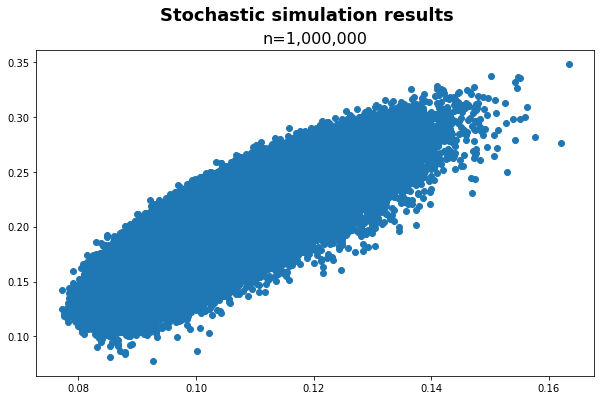

In [ ]:
risk_list = []
return_list = []

stop = 0

while stop < 1000000:
    try:
        stop += 1
        weight = np.random.rand(total_stock)
        weight = weight / sum(weight)
        return_list.append(sum(stocks_expected_return * weight))
        risk_list.append(np.sqrt(reduce(np.dot, [weight, covariance_matrix, weight.T])))
    except:
        pass

fig = plt.figure(figsize = (10,6))
fig.suptitle('Stochastic simulation results', fontsize=18, fontweight='bold')
ax = fig.add_subplot()
ax.plot(risk_list, return_list, 'o')
ax.set_title('n=1,000,000', fontsize=16)
fig.savefig('result.png',dpi=300)

In [ ]:
return_list_y = [i for i in return_list if i <0.1]
return_list_y

[0.0774905134445131,
 0.09753091957800047,
 0.09808435713118072,
 0.08084482383681811,
 0.08681406662024733,
 0.08350854002101157,
 0.08690101704857642,
 0.09439951462873462,
 0.0926628416211253,
 0.09160253914039561,
 0.09147649241091443,
 0.09761450864684315,
 0.08995551488013673,
 0.09277796522604279,
 0.08605502618064884,
 0.0932462446929876,
 0.09899507364514101,
 0.09205563855964634,
 0.09946801725124782,
 0.09451546112353035,
 0.09687115663265174]

In [ ]:
def standard_deviation(weights):
    return np.sqrt(reduce(np.dot, [weights, covariance_matrix, weights.T]))


In [ ]:
x0 = stocks_weights
bounds = tuple((0, 1) for x in range(total_stock))
constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}]
minimize_variance = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
mvp_risk = minimize_variance.fun
mvp_return = sum(minimize_variance.x * stocks_expected_return)

print('風險最小化投資組合預期報酬率為:' + str(round(mvp_return,2)))
print('風險最小化投資組合風險為:' + str(round(mvp_risk,2)))

### 結果如下
#   風險最小化投資組合預期報酬率為:0.12
#   風險最小化投資組合風險為:0.08

風險最小化投資組合預期報酬率為:0.12
風險最小化投資組合風險為:0.08


In [ ]:
bounds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [ ]:
for i in range(total_stock):
    print(str(df.columns[i])+' 佔投資組合權重 : ' + str(format(minimize_variance.x[i], '.4f')))


2317 佔投資組合權重 : 0.0000
2542 佔投資組合權重 : 0.2113
2881 佔投資組合權重 : 0.0420
2324 佔投資組合權重 : 0.1212
2535 佔投資組合權重 : 0.1827
5880 佔投資組合權重 : 0.3534
1101 佔投資組合權重 : 0.0731
2330 佔投資組合權重 : 0.0000
2301 佔投資組合權重 : 0.0162
4938 佔投資組合權重 : 0.0000


In [ ]:
x0 = stocks_weights
bounds = tuple((0, 1) for x in range(total_stock))

efficient_fronter_return_range = np.arange(0.05, 0.35, .005)
efficient_fronter_risk_list = []

for i in efficient_fronter_return_range:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: sum(x * stocks_expected_return) - i}]
    efficient_fronter = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
    efficient_fronter_risk_list.append(efficient_fronter.fun)

In [ ]:
bounds

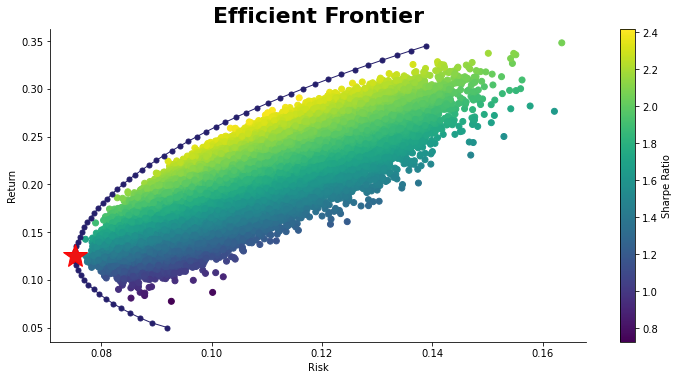

In [ ]:
risk_free = 0.01

fig = plt.figure(figsize = (12,6))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()

fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(risk_list, return_list,
                c=(np.array(return_list)-risk_free)/np.array(risk_list),
                marker = 'o')
ax.plot(efficient_fronter_risk_list, efficient_fronter_return_range, linewidth=1, color='#251f6b', marker='o',
         markerfacecolor='#251f6b', markersize=5)
ax.plot(mvp_risk, mvp_return,'*',color='r', markerfacecolor='#ed1313',  markersize=25)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Efficient Frontier', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Return')
fig.colorbar(ax0, ax=ax, label = 'Sharpe Ratio')
plt.savefig('Efficient_Frontier.png',dpi=300)

In [ ]:
#sortino ratio of stocks
for i in returns.columns :
  r = returns[i]
  print(i,r[r < 0].var())

2317 7.446856348599452e-05
2542 6.421219295211219e-05
2881 3.8266237276136425e-05
2324 4.165043637556951e-05
2535 8.903498730121396e-05
5880 3.320284682644467e-05
1101 0.0002461567446005037
2330 6.617279261524273e-05
2301 0.00013955659743397213
4938 0.00015093553329605713


In [ ]:
returns.columns

Index(['2317', '2542', '2881', '2324', '2535', '5880', '1101', '2330', '2301',
       '4938'],
      dtype='object')